In [1]:
!pip install -U scikit-learn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
from IPython.display import Image

**Data Collection**

In [4]:
df = pd.read_csv('creditcard_smot.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(283726, 31)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#All features means based on the class
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [10]:
#seperating the data and labels
X = df.drop(columns='Class',axis=1)
Y = df['Class']

In [11]:
print (X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
283721  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
283722  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
283723  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
283724  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
283725  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [12]:
print (Y)

0         0
1         0
2         0
3         0
4         0
         ..
283721    0
283722    0
283723    0
283724    0
283725    0
Name: Class, Length: 283726, dtype: int64


**Data Standardization**

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X)

StandardScaler()

In [15]:
standardized_data=scaler.transform(X)

In [16]:
print(standardized_data)

[[-1.99682292 -0.70108232 -0.04168726 ...  0.33303251 -0.06584955
   0.24419951]
 [-1.99682292  0.60879165  0.16413764 ... -0.0271543   0.0432187
  -0.34258399]
 [-1.99680186 -0.7003364  -0.81133678 ... -0.14432548 -0.18382429
   1.15889967]
 ...
 [ 1.64227757  0.98235398 -0.18043304 ...  0.00680174 -0.08264021
  -0.0822395 ]
 [ 1.64227757 -0.12646526  0.32465977 ...  0.27052318  0.31700384
  -0.31339058]
 [ 1.64236181 -0.27686005 -0.1127094  ... -0.01055821  0.03994074
   0.51329005]]


In [17]:
X = standardized_data
Y = df['Class']

In [18]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
283721    0
283722    0
283723    0
283724    0
283725    0
Name: Class, Length: 283726, dtype: int64


**Splitting dataset as training set and test set**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y ,test_size = 0.3, stratify=Y, random_state=42)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(283726, 30) (198608, 30) (85118, 30)


**Feature handling for decision tree algorithm**

In [21]:
X = df.drop(columns=['Class'])
y = df['Class']

**Use the taining dataset and train the decision tree classifier**

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

**Use Regularization**

In [23]:
dtc = DecisionTreeClassifier(ccp_alpha=0.01)

In [24]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

**Use the trained model to make predictions**

In [25]:
train_accuracy = dtc.score(X_train, Y_train)
print("Accuracy on training dataset: {:.10f}".format(train_accuracy))

Accuracy on training dataset: 0.9983334005


In [26]:
Y_pred = dtc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [27]:
print("Accuracy on test dataset: {:.10f}".format(accuracy))

Accuracy on test dataset: 0.9983317277


**Display the Diagram**

In [54]:
# Train the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
# Export the trained decision tree to Graphviz format
dot_data = export_graphviz(dtc, out_file=None,
                           feature_names=X.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

In [64]:
# Generate a PNG image of the decision tree
graph = graphviz.Source(dot_data)
graph.format = 'png'

In [68]:
graph.render('decision_tree')

'decision_tree.png'

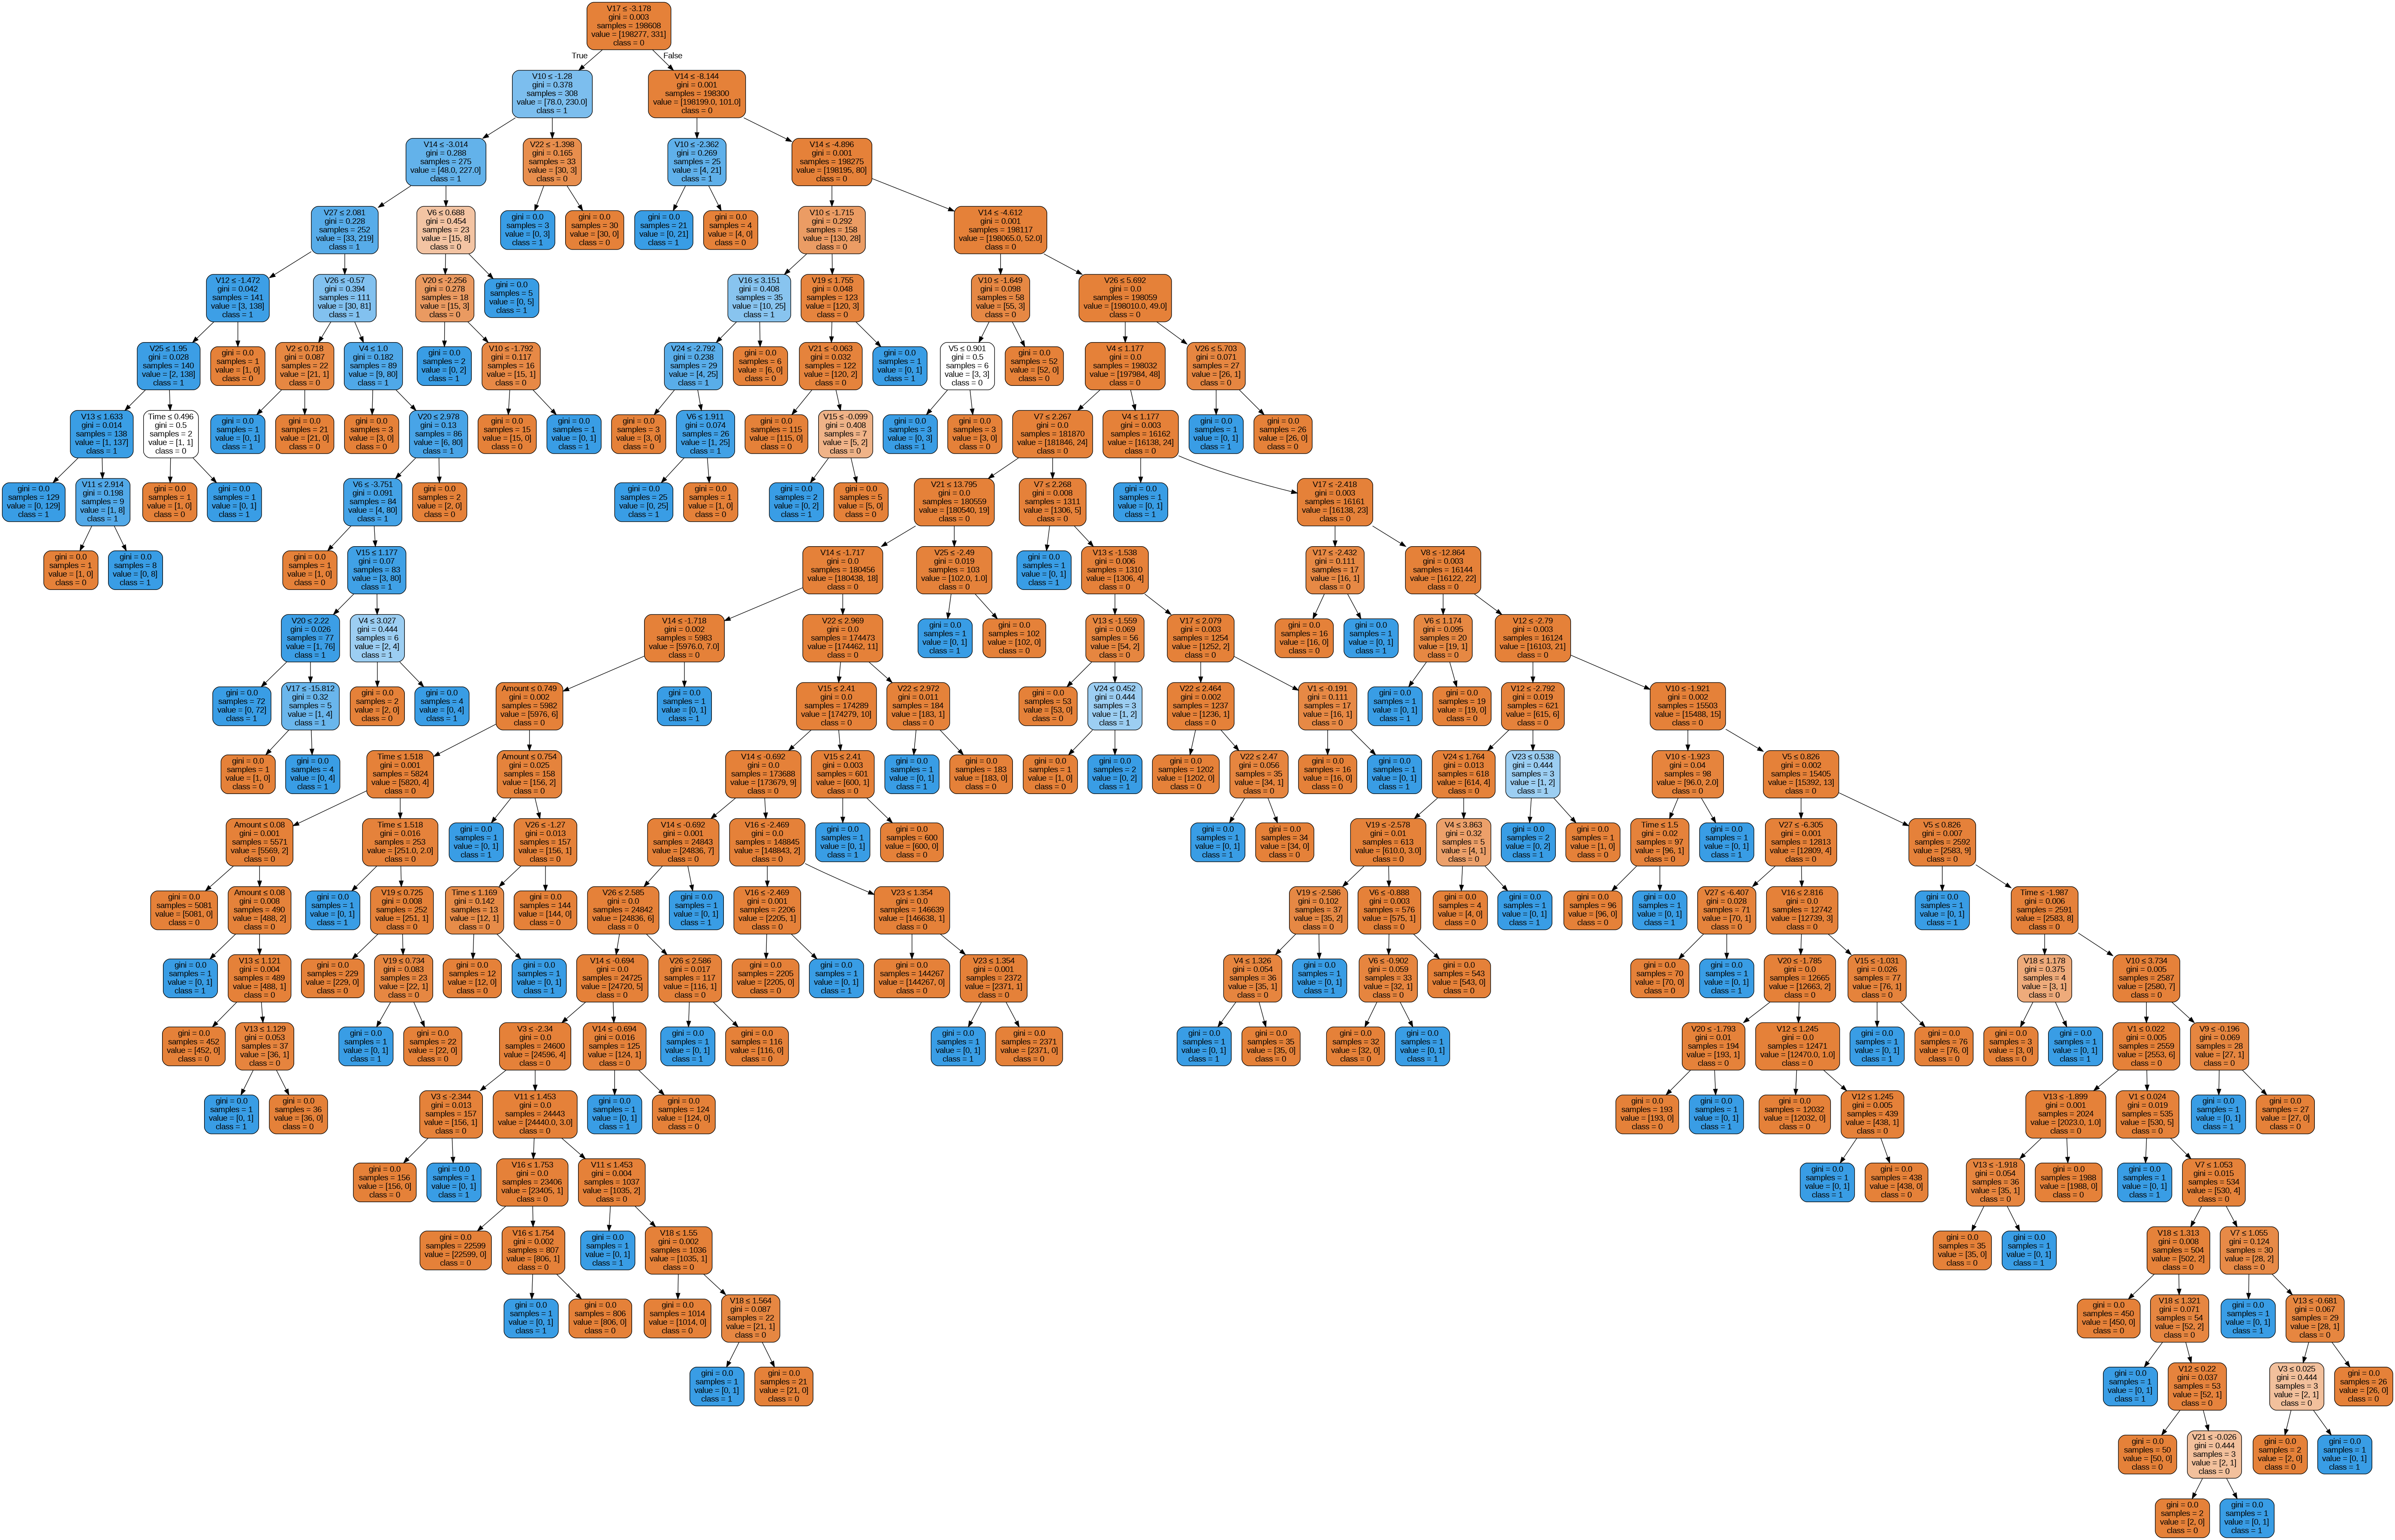

In [69]:
# Display the PNG image
Image('decision_tree.png')